In [1]:
!wget https://raw.githubusercontent.com/ComputoCienciasUniandes/IntroDeepLearning_202102/main/datos/MLP_regresion.csv

--2021-08-20 03:26:26--  https://raw.githubusercontent.com/ComputoCienciasUniandes/IntroDeepLearning_202102/main/datos/MLP_regresion.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38262 (37K) [text/plain]
Saving to: ‘MLP_regresion.csv.1’

MLP_regresion.csv.1 100%[===================>]  37.37K  --.-KB/s    in 0.002s  

2021-08-20 03:26:26 (20.5 MB/s) - ‘MLP_regresion.csv.1’ saved [38262/38262]



In [2]:
#--- Cargamos el paquete torch y otras utilidades
import torch
from torch.autograd import Variable # Para convertir nuestras varaibles a tensores
import torch.utils.data as Data

import numpy as np



In [3]:
import pandas as pd
data = pd.read_csv("MLP_regresion.csv")
data.head()

,X,Y
0,-10.00000,0.929135
1,-9.97998,0.634406
2,-9.95996,0.946741
3,-9.93994,0.578634
4,-9.91992,0.721276


In [4]:
x=data["X"]
y=data["Y"]

In [5]:
np.shape(x), np.shape(y)

((1000,), (1000,))

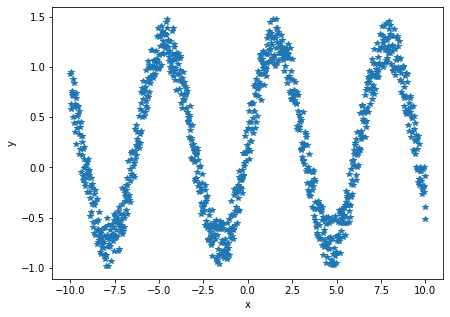

In [6]:
#--- Visualizamos los datos

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,5))
plt.plot(x,y,'*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:

#--- Convertimos los numpy a tensores
x=np.asarray(x)
y=np.asarray(y)
X = Variable(torch.from_numpy(x)).float()
X = torch.unsqueeze(X,dim=1)


Y = Variable(torch.from_numpy(y)).float()
Y = torch.unsqueeze(Y,dim=1)

##**Primer Modelo**

In [8]:
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, 1024),
                 torch.nn.ReLU(),
                torch.nn.Linear(1024, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, 512),
                torch.nn.ReLU(),
                torch.nn.Linear(512, input_dim),
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=1024, bias=True)
  (3): ReLU()
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): ReLU()
  (6): Linear(in_features=512, out_features=512, bias=True)
  (7): ReLU()
  (8): Linear(in_features=512, out_features=512, bias=True)
  (9): ReLU()
  (10): Linear(in_features=512, out_features=1, bias=True)
)

In [9]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

Epoch: [1/1], loss: 0.5483036041259766


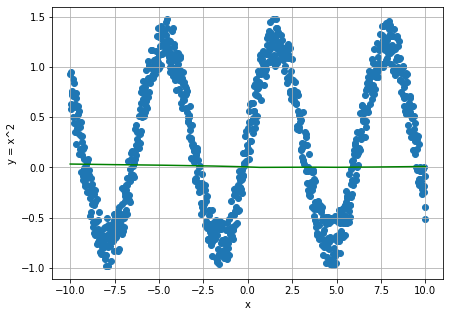

Epoch: [1/51], loss: 0.47098103165626526


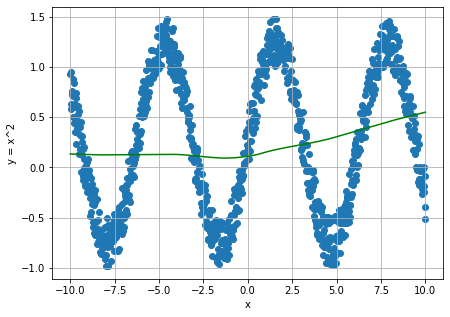

Epoch: [1/101], loss: 0.46273085474967957


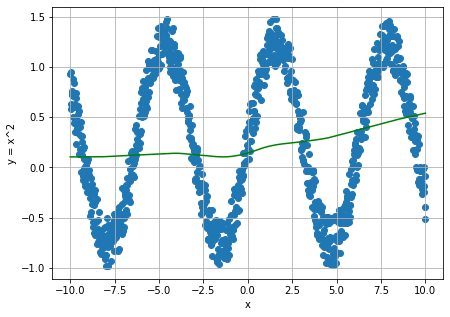

Epoch: [1/151], loss: 0.45571979880332947


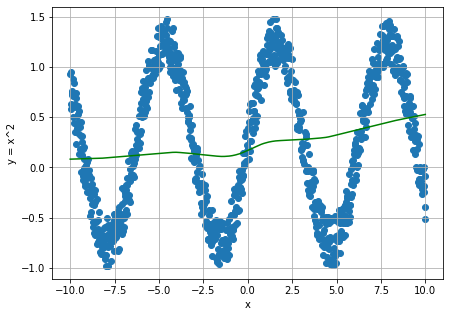

Epoch: [1/201], loss: 0.4481543004512787


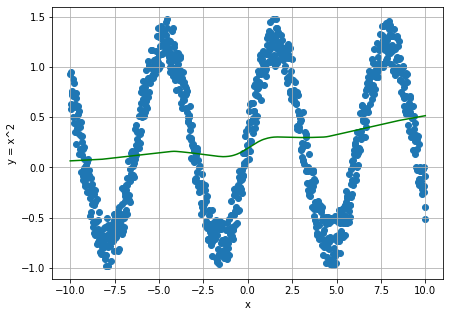

Epoch: [1/251], loss: 0.43921786546707153


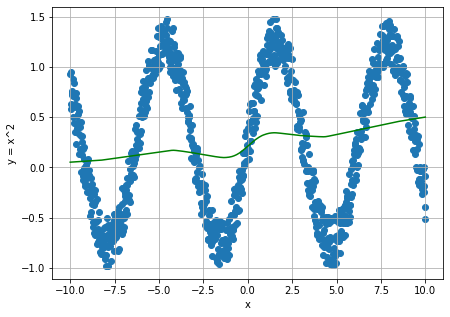

Epoch: [1/301], loss: 0.4283953309059143


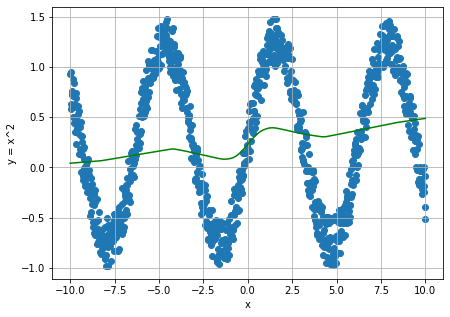

Epoch: [1/351], loss: 0.41524580121040344


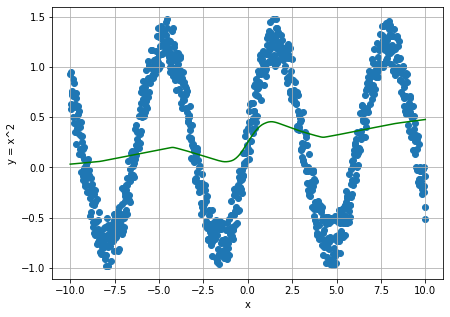

Epoch: [1/401], loss: 0.3984224498271942


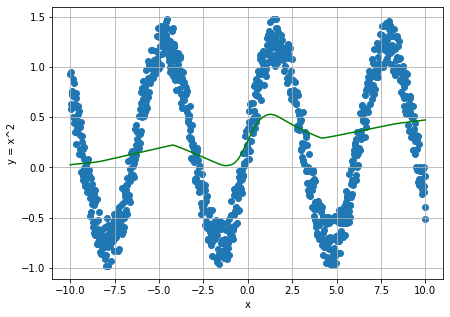

Epoch: [1/451], loss: 0.3776419162750244


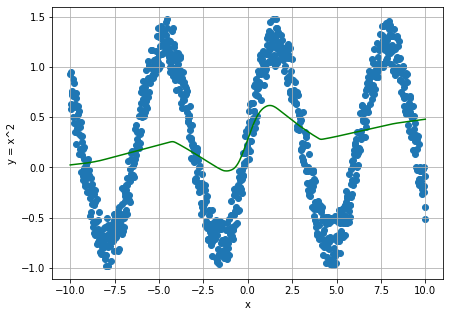

Epoch: [1/501], loss: 0.35327157378196716


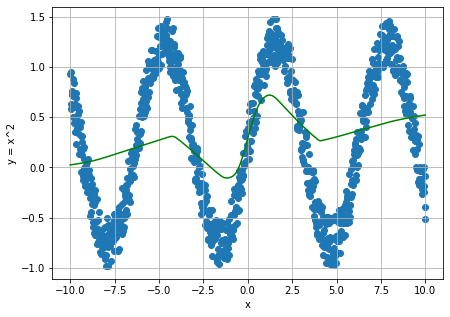

Epoch: [1/551], loss: 0.33967483043670654


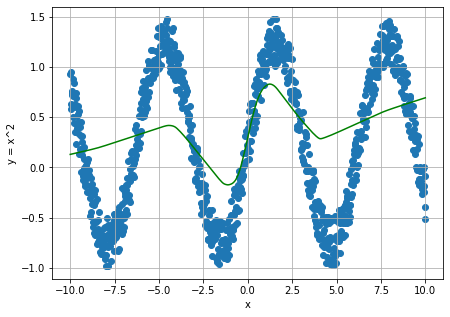

Epoch: [1/601], loss: 0.33421799540519714


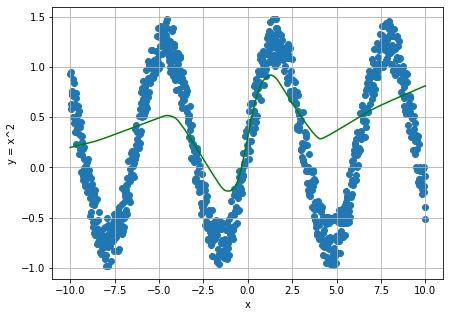

Epoch: [1/651], loss: 0.3061070144176483


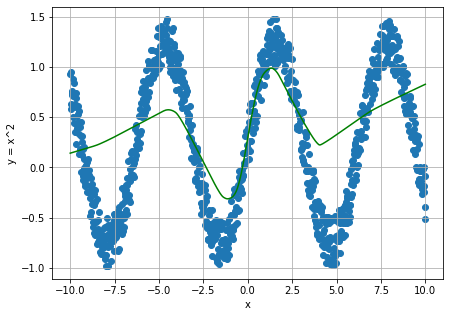

Epoch: [1/701], loss: 0.2837839126586914


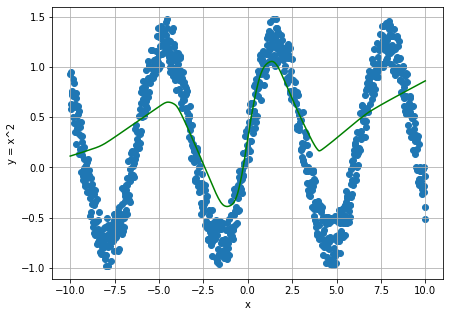

Epoch: [1/751], loss: 0.26034972071647644


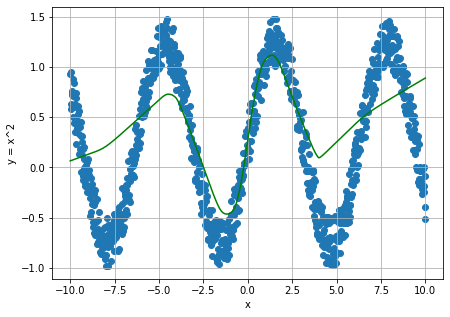

Epoch: [1/801], loss: 0.23774667084217072


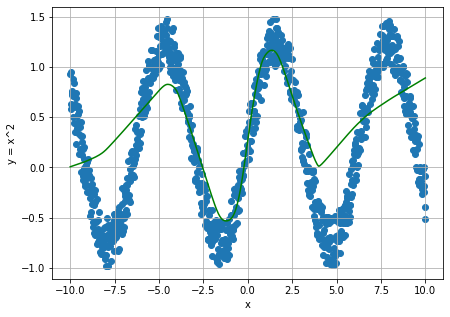

Epoch: [1/851], loss: 0.21389169991016388


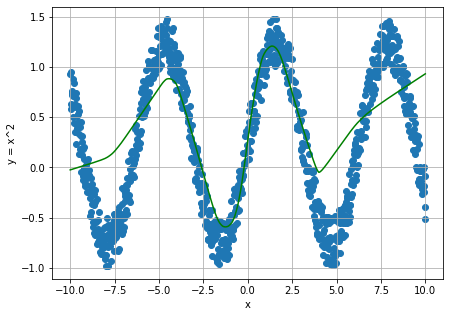

Epoch: [1/901], loss: 0.20042702555656433


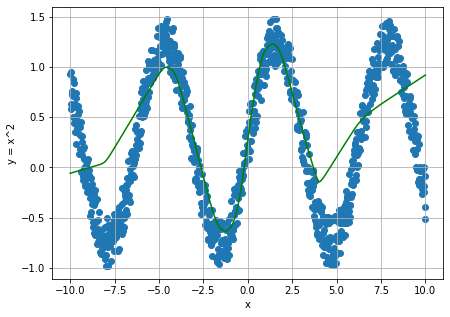

Epoch: [1/951], loss: 0.18372252583503723


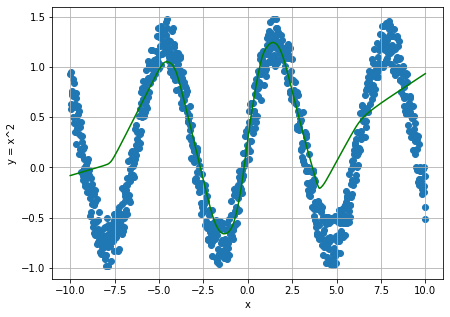

Epoch: [1/1001], loss: 0.1719023436307907


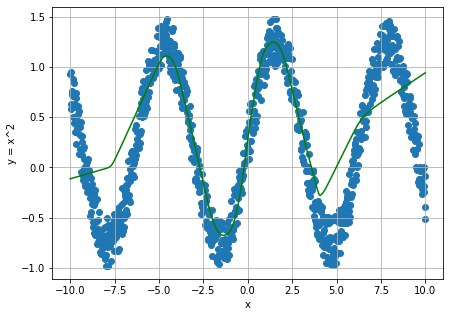

Epoch: [1/1051], loss: 0.16099220514297485


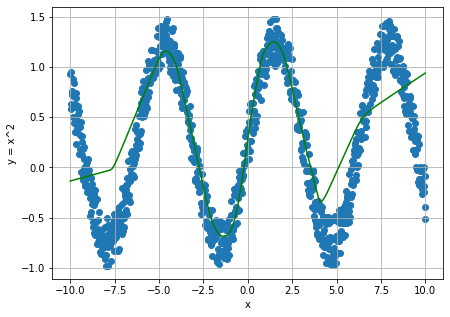

Epoch: [1/1101], loss: 0.1522446870803833


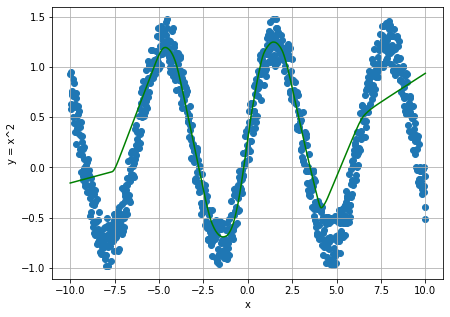

Epoch: [1/1151], loss: 0.14422383904457092


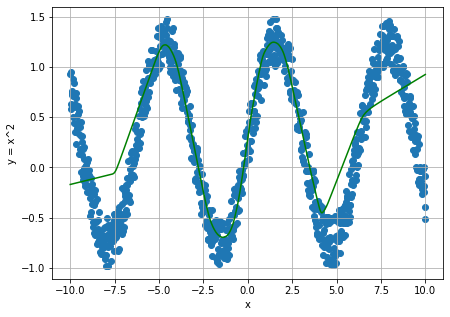

Epoch: [1/1201], loss: 0.136599600315094


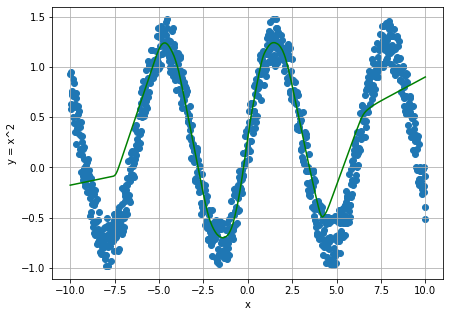

Epoch: [1/1251], loss: 0.13039427995681763


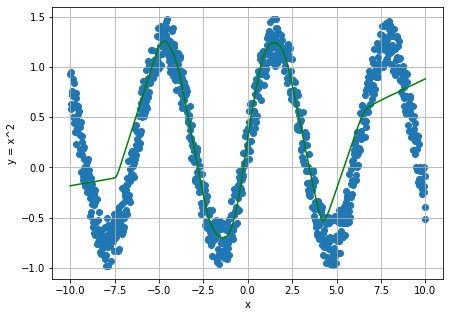

Epoch: [1/1301], loss: 0.12460582703351974


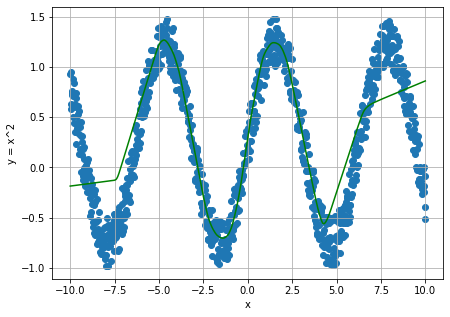

Epoch: [1/1351], loss: 0.11902928352355957


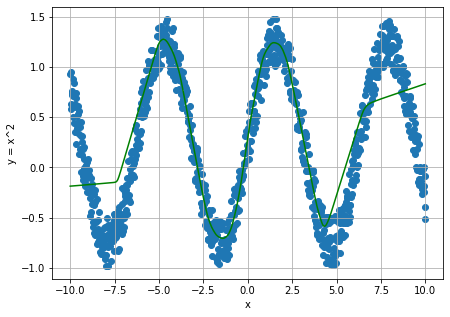

Epoch: [1/1401], loss: 0.1142134889960289


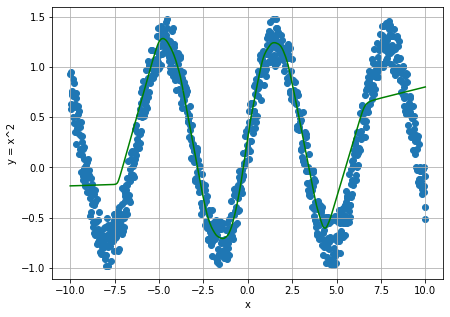

Epoch: [1/1451], loss: 0.10993022471666336


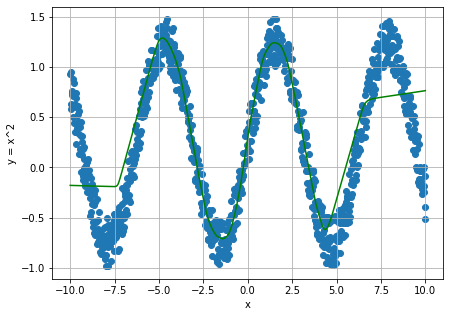

Epoch: [1/1501], loss: 0.10644298046827316


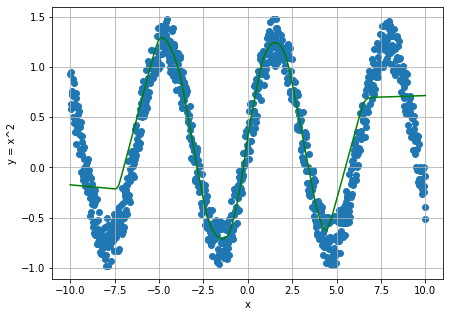

Epoch: [1/1551], loss: 0.1031242087483406


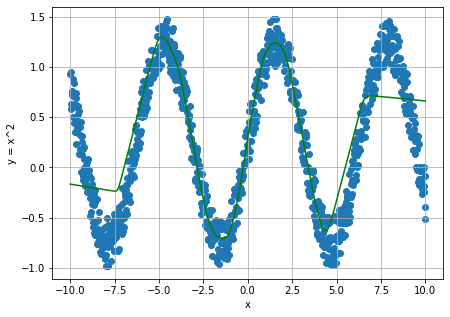

Epoch: [1/1601], loss: 0.10221600532531738


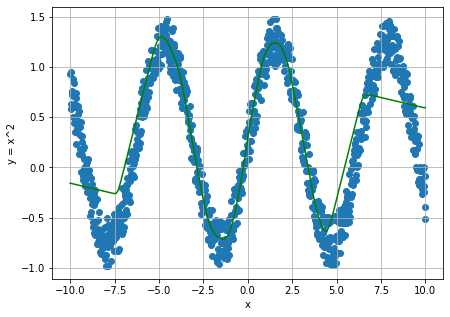

Epoch: [1/1651], loss: 0.10150670260190964


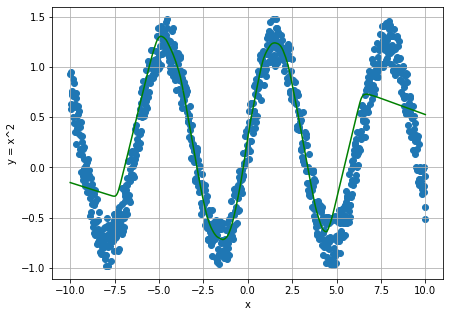

Epoch: [1/1701], loss: 0.10197240114212036


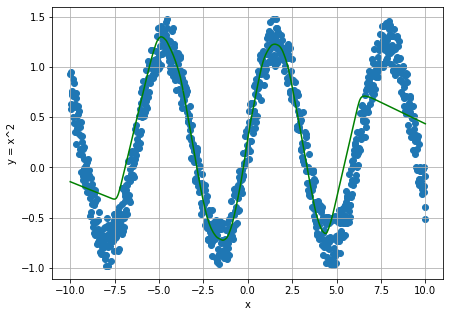

Epoch: [1/1751], loss: 0.09960845112800598


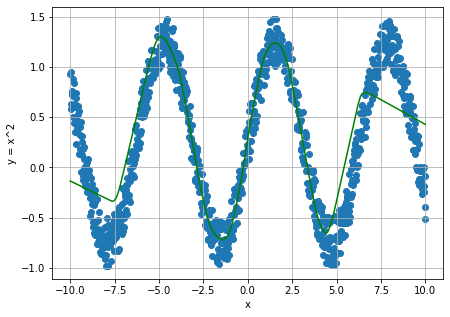

Epoch: [1/1801], loss: 0.10850397497415543


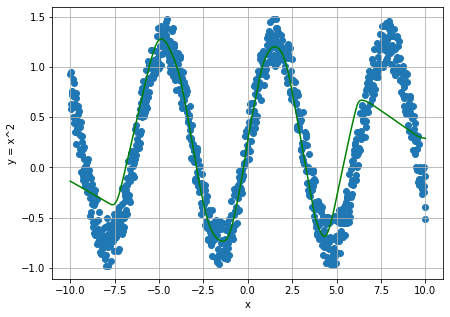

Epoch: [1/1851], loss: 0.09687583893537521


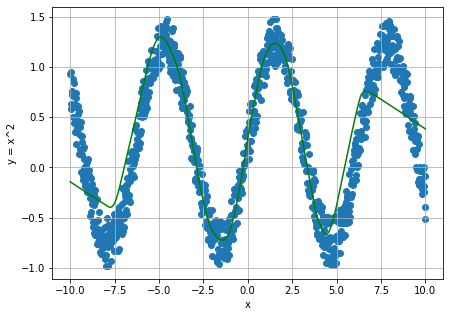

Epoch: [1/1901], loss: 0.09282297641038895


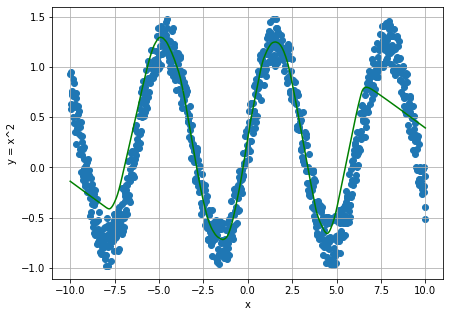

Epoch: [1/1951], loss: 0.11120548844337463


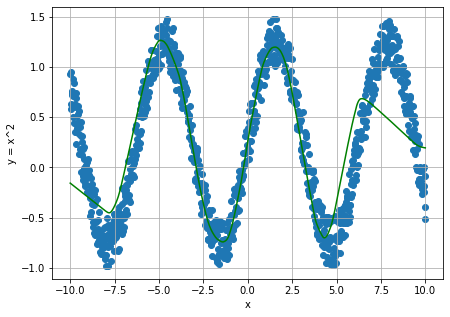

Epoch: [1/2001], loss: 0.09508226811885834


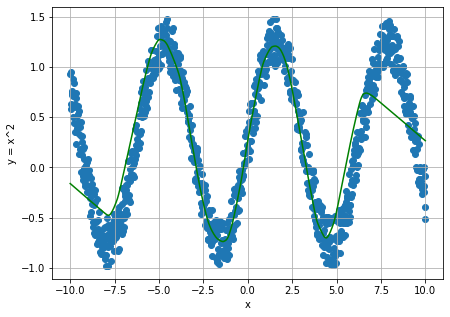

In [10]:
#-- Definimos el número de épocas
n_epoch = 2001
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y = x^2')
      plt.show()

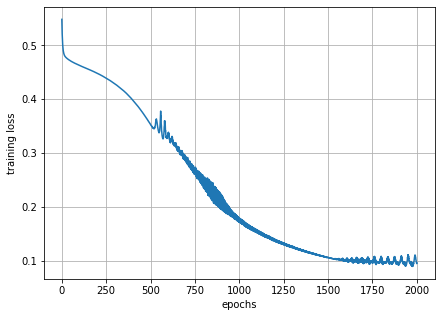

In [11]:
#-- Graficamos la perdida
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

##**Segundo Modelo**

In [12]:
input_dim = 1
model = torch.nn.Sequential(
                torch.nn.Linear(input_dim, 400),
                torch.nn.ReLU(),
                torch.nn.Linear(400, 400),
                 torch.nn.ReLU(),
                torch.nn.Linear(400, 400),
                torch.nn.ReLU(),
                torch.nn.Linear(400, 400),
                torch.nn.ReLU(),
                torch.nn.Linear(400, 400),
                torch.nn.ReLU(),
                torch.nn.Linear(400, input_dim),
                )
model

Sequential(
  (0): Linear(in_features=1, out_features=400, bias=True)
  (1): ReLU()
  (2): Linear(in_features=400, out_features=400, bias=True)
  (3): ReLU()
  (4): Linear(in_features=400, out_features=400, bias=True)
  (5): ReLU()
  (6): Linear(in_features=400, out_features=400, bias=True)
  (7): ReLU()
  (8): Linear(in_features=400, out_features=400, bias=True)
  (9): ReLU()
  (10): Linear(in_features=400, out_features=1, bias=True)
)

In [13]:
#-- Definimos el opmimizador y el score de evaluación
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = torch.nn.MSELoss()  # Para una regresión es mejor usar MSE

Epoch: [1/1], loss: 0.5326458811759949


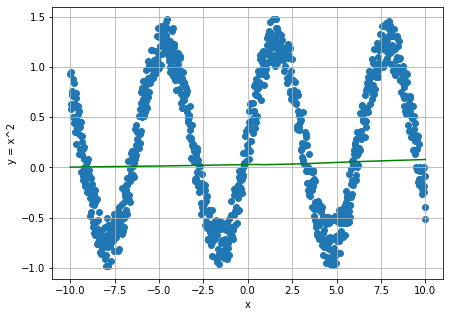

Epoch: [1/51], loss: 0.4729415774345398


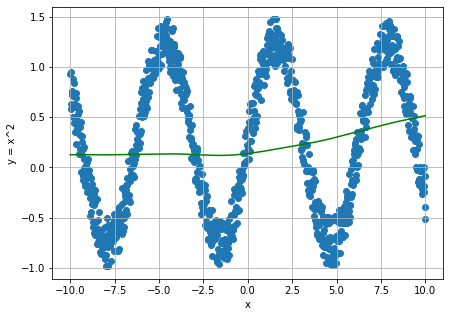

Epoch: [1/101], loss: 0.46607062220573425


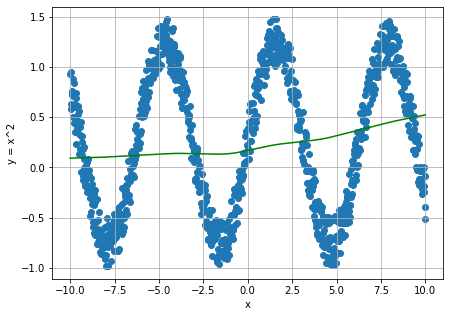

Epoch: [1/151], loss: 0.46116456389427185


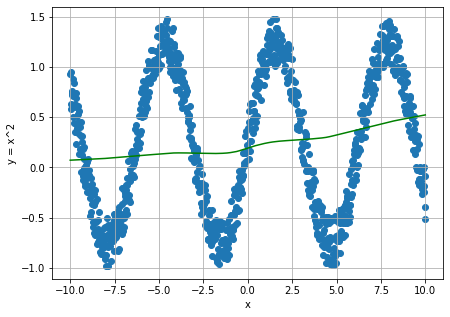

Epoch: [1/201], loss: 0.45655694603919983


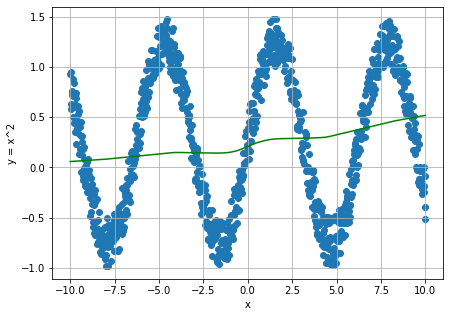

Epoch: [1/251], loss: 0.4516259729862213


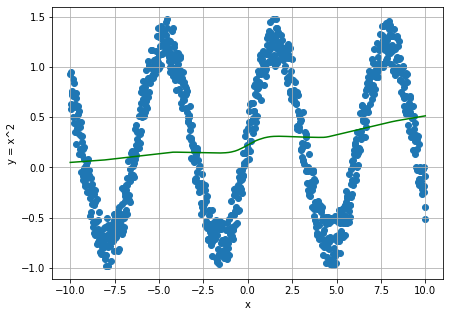

Epoch: [1/301], loss: 0.4460497200489044


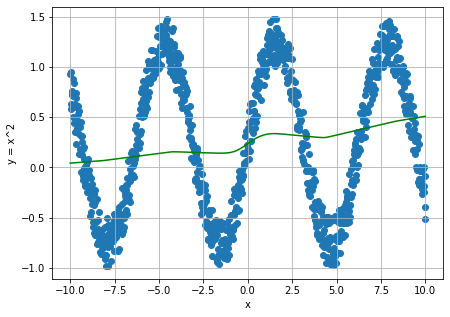

Epoch: [1/351], loss: 0.4393780827522278


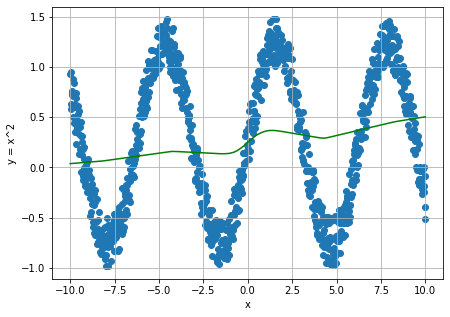

Epoch: [1/401], loss: 0.4313386082649231


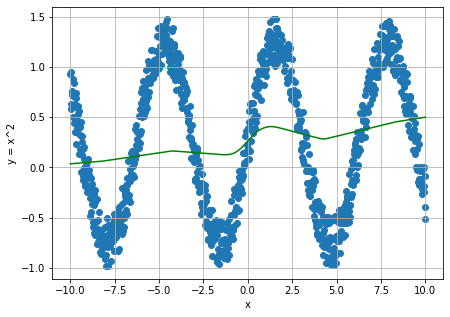

Epoch: [1/451], loss: 0.421207994222641


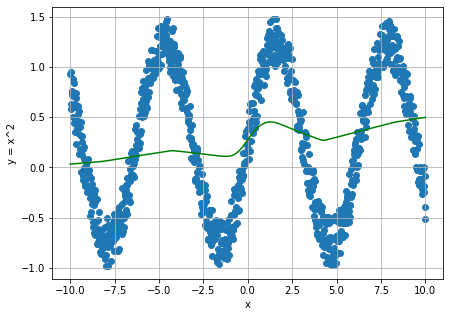

Epoch: [1/501], loss: 0.4085192382335663


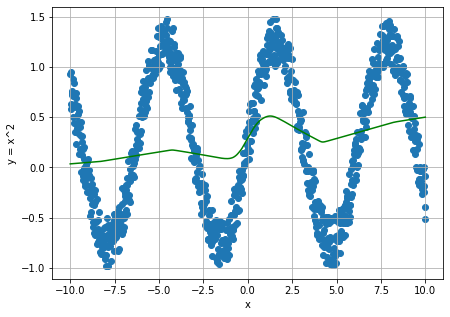

Epoch: [1/551], loss: 0.3925866186618805


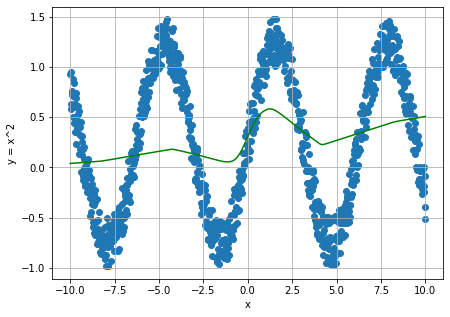

Epoch: [1/601], loss: 0.37231793999671936


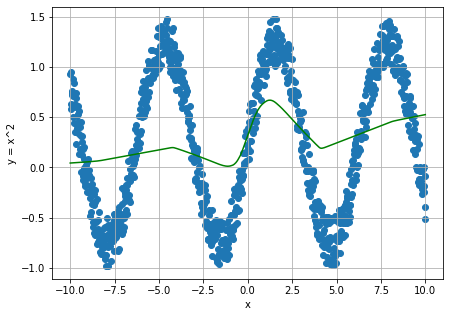

Epoch: [1/651], loss: 0.34857165813446045


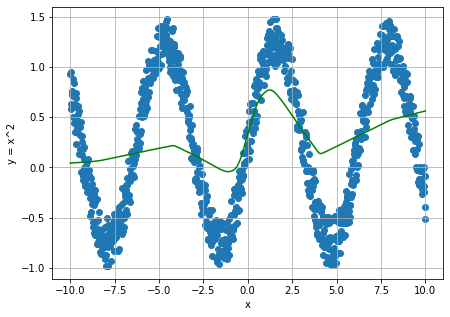

Epoch: [1/701], loss: 0.32358694076538086


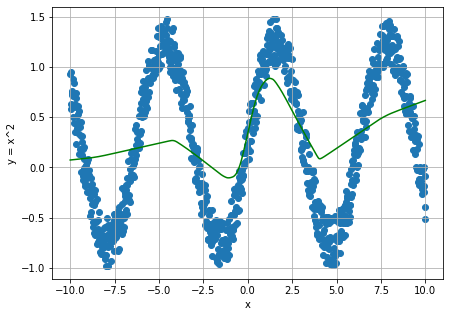

Epoch: [1/751], loss: 0.34094610810279846


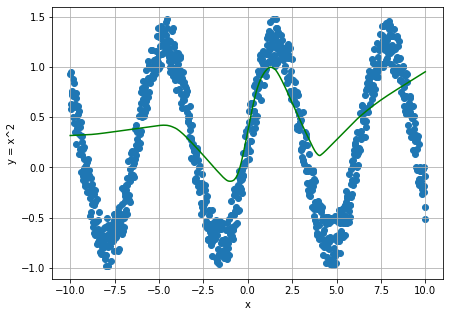

Epoch: [1/801], loss: 0.29387176036834717


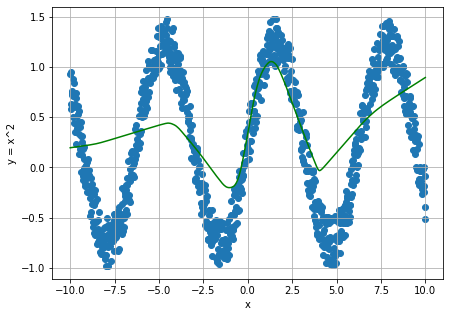

Epoch: [1/851], loss: 0.28062331676483154


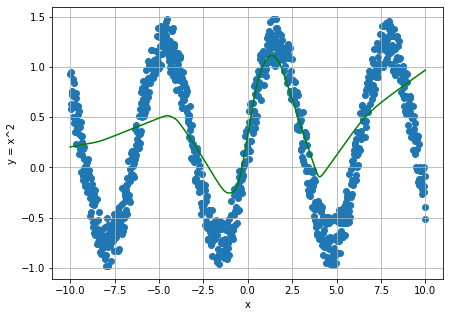

Epoch: [1/901], loss: 0.2583939731121063


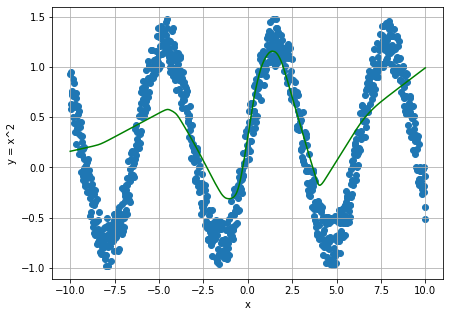

Epoch: [1/951], loss: 0.23878207802772522


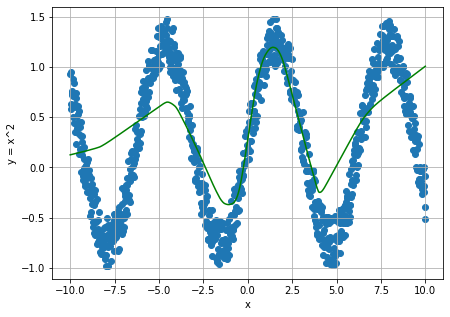

Epoch: [1/1001], loss: 0.22014179825782776


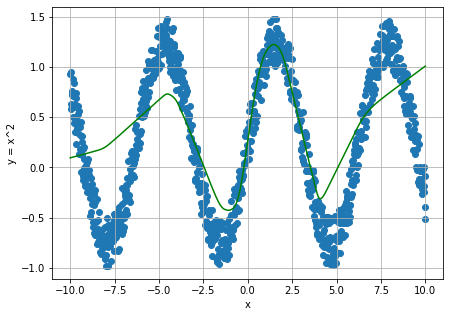

Epoch: [1/1051], loss: 0.20188333094120026


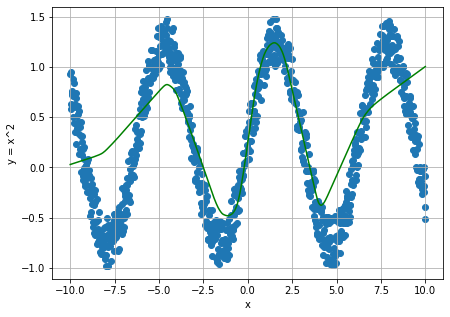

Epoch: [1/1101], loss: 0.18346600234508514


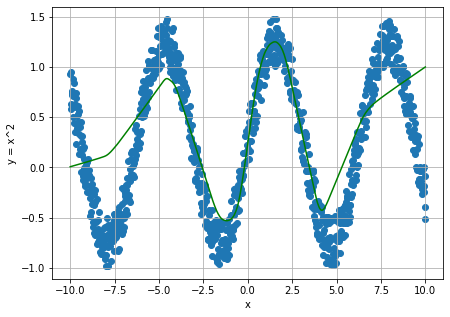

Epoch: [1/1151], loss: 0.16917958855628967


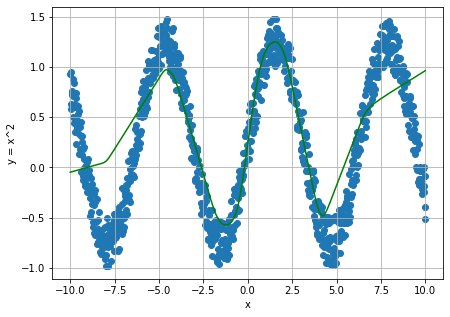

Epoch: [1/1201], loss: 0.15733936429023743


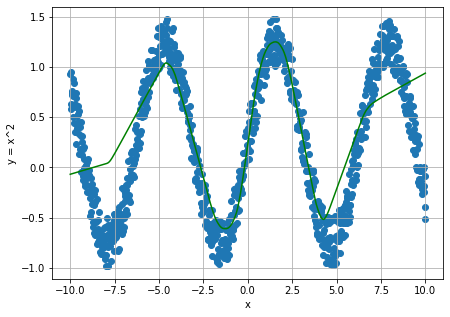

Epoch: [1/1251], loss: 0.1473117619752884


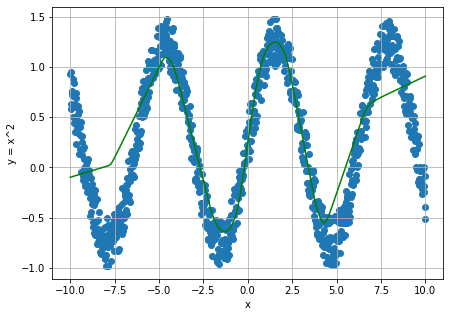

Epoch: [1/1301], loss: 0.13784795999526978


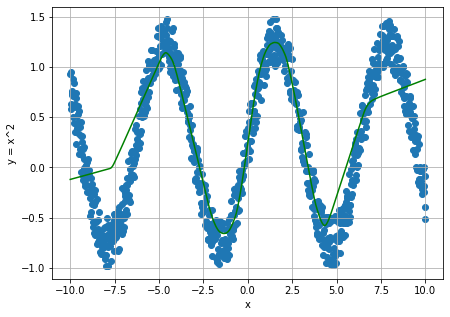

Epoch: [1/1351], loss: 0.12967005372047424


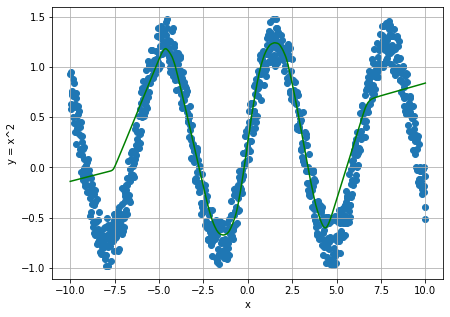

Epoch: [1/1401], loss: 0.1226460412144661


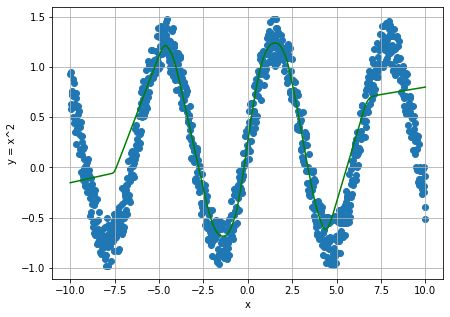

Epoch: [1/1451], loss: 0.11669666320085526


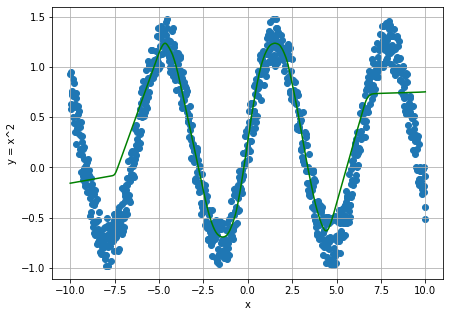

Epoch: [1/1501], loss: 0.11261743307113647


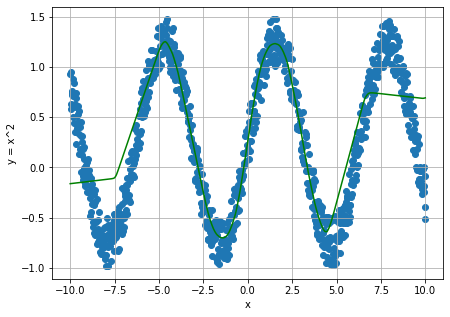

Epoch: [1/1551], loss: 0.10880279541015625


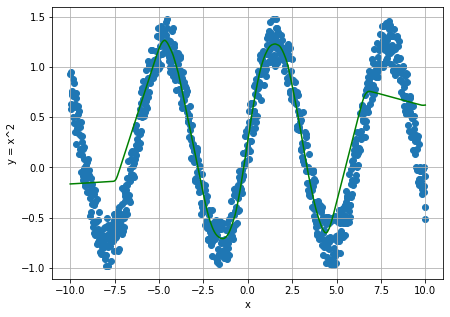

Epoch: [1/1601], loss: 0.10624171048402786


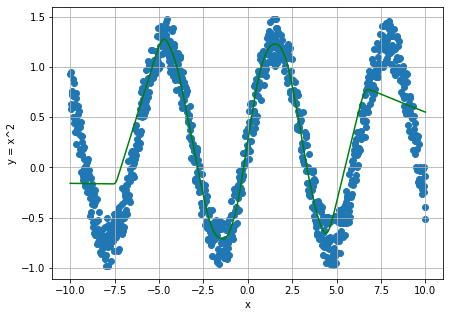

Epoch: [1/1651], loss: 0.10740754008293152


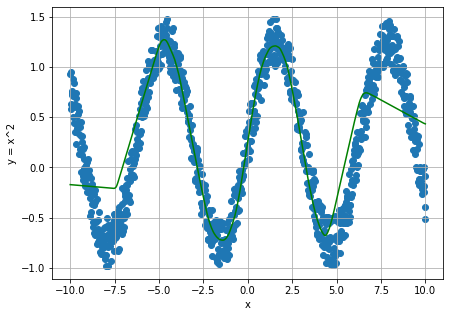

Epoch: [1/1701], loss: 0.10344161093235016


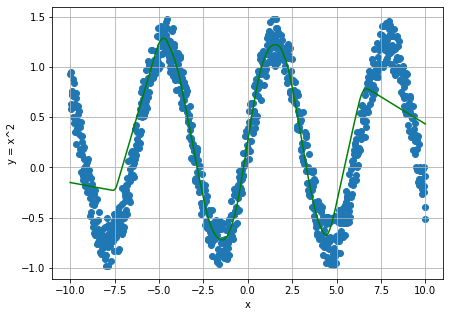

Epoch: [1/1751], loss: 0.11336557567119598


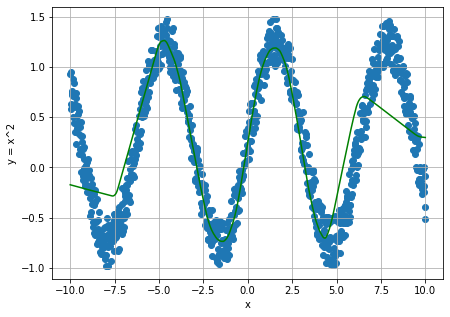

Epoch: [1/1801], loss: 0.0995398759841919


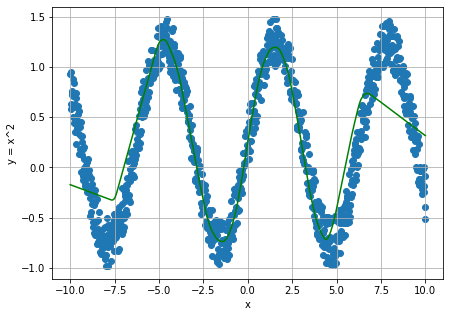

Epoch: [1/1851], loss: 0.0923570990562439


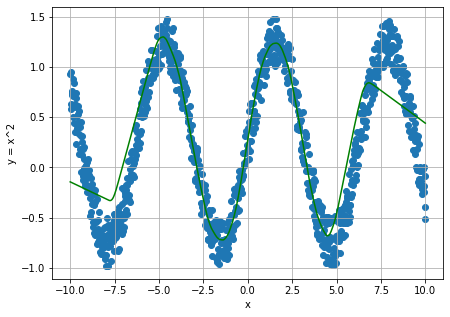

Epoch: [1/1901], loss: 0.08881955593824387


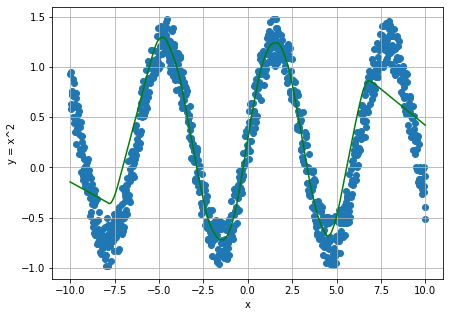

Epoch: [1/1951], loss: 0.09931984543800354


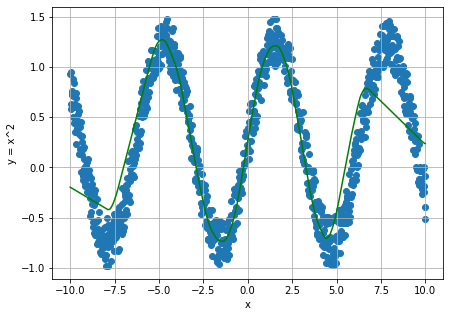

Epoch: [1/2001], loss: 0.12118043750524521


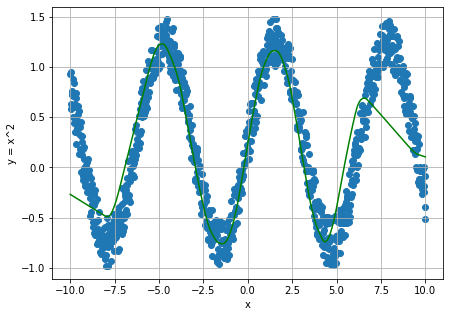

In [14]:
#-- Definimos el número de épocas
n_epoch = 2001
loss_list = []

# Entrenamos la red 
for epoch in range(n_epoch+1):
  
    Y_pred = model(X)   # Hace una predicción basada en X

    loss = criterion(Y_pred, Y)
    loss_list.append(loss.item())

    optimizer.zero_grad()   # Limpia los gradientes para una nueva predicción
    loss.backward()         # Backpropagation
    optimizer.step()        # Aplica los gradientes
    
    if (epoch%50 == 0):
      print('Epoch: [1/{}], loss: {}'.format(epoch+1,loss.item()))
      fig = plt.figure(figsize=(7,5))
      plt.scatter(X.data.numpy(), Y.data.numpy())
      plt.plot(X.data.numpy(), Y_pred.data.numpy(), 'g-')
      plt.grid()
      plt.xlabel('x')
      plt.ylabel('y = x^2')
      plt.show()

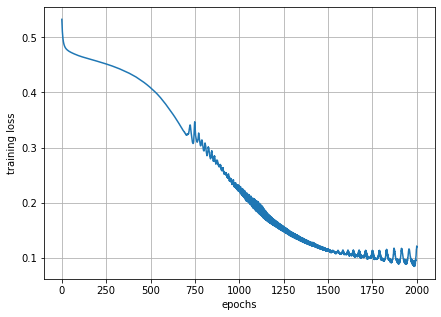

In [15]:
#-- Graficamos la perdida
fig = plt.figure(figsize=(7, 5))
plt.plot(loss_list)
plt.ylabel("training loss")
plt.xlabel("epochs")
plt.grid()
plt.show()

#Comentarios
El primer modelo se hace con 5 capas de 512 neuronas y una capa que va a 1024 neuronas y este llega con una perdida del 0.095 y el segundo modelo se hace con 6 capas de 1024 neuronas y una perdida final de 0.121, donde los modelos se hacen con 2001 epocas.

Se puede observar que cuando se aumentan las capas el tiempo aumenta y tambien las neuronas aumenta el tiempo. Tambien, se puede observar como hay mayor fluctuaciones cuando hay menor numeros de neuronas. Por ejemplo, en alguna epoca los dos modelos alcanza perdida menor de 0.1 pero la fluctuacion en el segundo modelo es mayor y la perdida termina siendo mayor que 0.1 

Si aumentamos las capas es posible que se llegue a menor perdida pero el tiempo de ejecución se aumenta.
